<a href="https://colab.research.google.com/github/rimosoma/neural/blob/main/lab1_second_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit recognition with a CNN

Machine Learning and Neural Networks

Image classification with a CNN

Lab duration: 3h

Download the starting notebook from Portale della didattica (lab1.ipynb) and upload it to
Google Colab.

Exercise – Handwritten digit recognition

The MNIST dataset is composed of images of handwritten digits. There are 60000 training
images and 10000 testing images. The images are grayscale with size 28 x 28. Labels
identifying the true digit are also provided.
A loader function is already provided. It returns the following tensors as numpy arrays:
-  x_train: images to be used for training
-  y_train: labels to be used for training (integers from 0 to 9)
-  x_test: images to be used for testing
-  y_test: labels to be used for testing (integers from 0 to 9)
quindi **sparse_categorical**

Fill the empty code cells of the notebook following the instructions. The final goal is to build
a CNN that given a digit image predicts its value.
The CNN is to be implemented as a **Keras Model** using the **Sequential Model**.
The loss function is a softmax cross-entropy.

Code to initiliaze Tensorflow 2.0 in Colab

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
%load_ext tensorboard
import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Import the MNIST dataset. The default loader will return tensors for the train/test partitions of the images and the labels.**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:,:,:,np.newaxis]/255.0
x_test = x_test[:,:,:,np.newaxis]/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**[TODO] Check the size of the loaded tensors**

In [3]:
print(x_train.shape)
print(y_train.shape)
print("\n"
    "this is coherent because the images are 60000, they are 28x28 and thay are"
      "\ngrayscale so the channel is only one"
      "\n"
      "\nand in the y tensor instead are only saved 60000 scalars because it is needed"
      "\njust to store the labels of each image(index of the list)")
#print(x_train[0][1])

(60000, 28, 28, 1)
(60000,)

this is coherent because the images are 60000, they are 28x28 and thay are
grayscale so the channel is only one

and in the y tensor instead are only saved 60000 scalars because it is needed
just to store the labels of each image(index of the list)


**Prepare Keras callback for Tensorboard**

In [ ]:
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
%tensorboard --logdir logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='batch')

**[TODO] Define a Keras Sequential model with the convolutional neural network**

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)), # Recommended way to specify input shape

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GlobalAveragePooling2D(), # Convert 3D feature maps to 1D feature vectors
    tf.keras.layers.Dense(10, activation='softmax') # Output layer for 10 classes
])

#sarebbe piu opportuno fare:
#conv2d senza activation
#layer di batch normalization
#layer di relu, esiste proprio un layer apposta
#tranne poi sull'ultimo layer in cui bisognerebbe fare:
#layer global avarage pooling
#full connected layer
#come mostrato a slide 90

**[TODO] Compile the Keras model: specify the optimization algorithm, the loss function and the test metric**

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**[TODO] Train the Keras model**

In [7]:
model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8336 - loss: 0.5494
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9613 - loss: 0.1275
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9719 - loss: 0.0949
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9732 - loss: 0.0833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9786 - loss: 0.0701
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0678
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9823 - loss: 0.0556
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9838 - loss: 0.0549
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0516
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0498


**[TODO] Print model summary**

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,680 (1.08 MB)

 Trainable params: 94,410 (368.79 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 188,822 (737.59 KB)

**[TODO] Test the Keras model by computing the accuracy the whole test set**

In [9]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9700 - loss: 0.1009


[0.08744829148054123, 0.9753999710083008]

**[TODO] Visualize test image number 47 and the prediction from the neural network**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
the most probable prediction is: 2


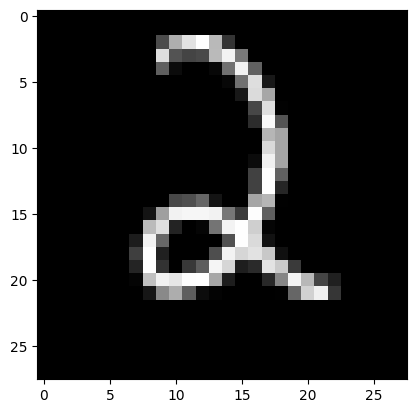

In [10]:
#Visualize test image number 47 and the prediction from the neural network
plt.imshow(x_test[47].reshape(28,28),cmap='gray')
false_new_value = x_test[47]
prediction = model.predict(false_new_value.reshape(1,28,28,1))
index_predict = np.argmax(prediction)
print("the most probable prediction is:",index_predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
the most probable prediction is: 3


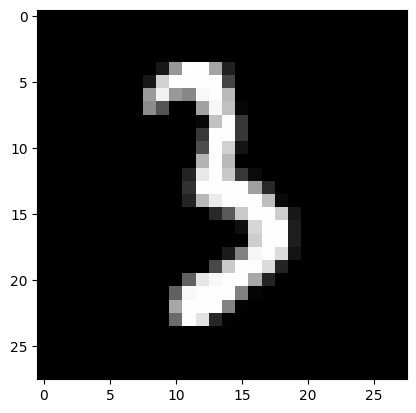

In [11]:
#Visualize test image number 44 and the prediction from the neural network
plt.imshow(x_test[44].reshape(28,28),cmap='gray')
false_new_value = x_test[44]
prediction = model.predict(false_new_value.reshape(1,28,28,1))
index_predict = np.argmax(prediction)
print("the most probable prediction is:",index_predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the most probable prediction is: 4


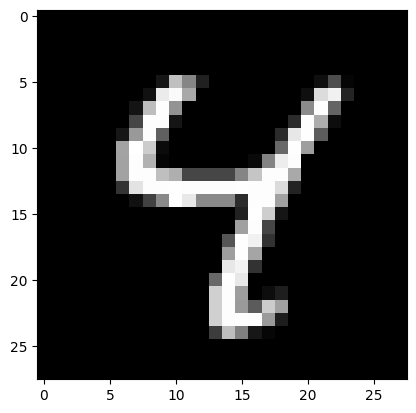

In [12]:
#Visualize test image number 6 and the prediction from the neural network
plt.imshow(x_test[6].reshape(28,28),cmap='gray')
false_new_value = x_test[6]
prediction = model.predict(false_new_value.reshape(1,28,28,1))
index_predict = np.argmax(prediction)
print("the most probable prediction is:",index_predict)
